Imports

In [2]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
#python packages
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pac

import seaborn as sns
sns.set_style('white')

import imp
import shape
import utils
imp.reload(utils)
imp.reload(shape)

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


<module 'shape' from '/Users/nick/Documents/brainwaves/swann/pypybaby/Cole_2017-master/shape.py'>

<b> Load data and compute waveform shape metrics and PAC

In [3]:
widthS = 3#parameter for sharpness calulation
Fs, t, S, Sc, flo, fhi = utils.loadmeta()
eeg,rejects = utils.loadPD()
pks,trs,ShR,PTR,StR,RDR = utils.measure_shape(eeg,rejects, widthS=widthS)
pac = utils.measure_pac(eeg,rejects,flo,fhi,Fs=Fs)

/anaconda3/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1364: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1367: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.ar

Sensorimotor sharpness Ratio (ShR), steepness Ratio (StR), and PAC all decrease with medication (Wilcoxon sign rank, p=0.006, p=0.004, p=0.01, respectively)

In [4]:
def pooldata(x):
    z=(x[0:int(len(x)/2)]+x[int(len(x)/2):len(x)])/2
    z=np.array(z,dtype=float)
    return z

pacoff=pooldata(pac['off'])
pacon=pooldata(pac['on'])
pacC=pooldata(pac['C'])

ShRoff=pooldata(ShR['off'])
ShRon=pooldata(ShR['on'])
ShRC=pooldata(ShR['C'])

StRoff=pooldata(StR['off'])
StRon=pooldata(StR['on'])
StRC=pooldata(StR['C'])

print('ShR')
print(sp.stats.wilcoxon(ShRoff,ShRon))
print('StR')
print(sp.stats.wilcoxon(StRoff,StRon))
print('PAC')
print(sp.stats.wilcoxon(pacoff,pacon)) 

print('ShR')
print(sp.stats.ranksums(ShRoff,ShRC))
print('StR')
print(sp.stats.ranksums(StRoff,StRC))
print('PAC')
print(sp.stats.ranksums(pacoff,pacC))

ShR
WilcoxonResult(statistic=12.0, pvalue=0.0064064902221673695)
StR
WilcoxonResult(statistic=9.0, pvalue=0.003772239574473987)
PAC
WilcoxonResult(statistic=15.0, pvalue=0.010593539088689496)
ShR
RanksumsResult(statistic=0.909154827298409, pvalue=0.36326840504902125)
StR
RanksumsResult(statistic=2.5298221281347035, pvalue=0.011412036386001651)
PAC
RanksumsResult(statistic=1.1858541225631423, pvalue=0.2356799134290376)


<b><font size="5">Figure 2

<function matplotlib.pyplot.show>

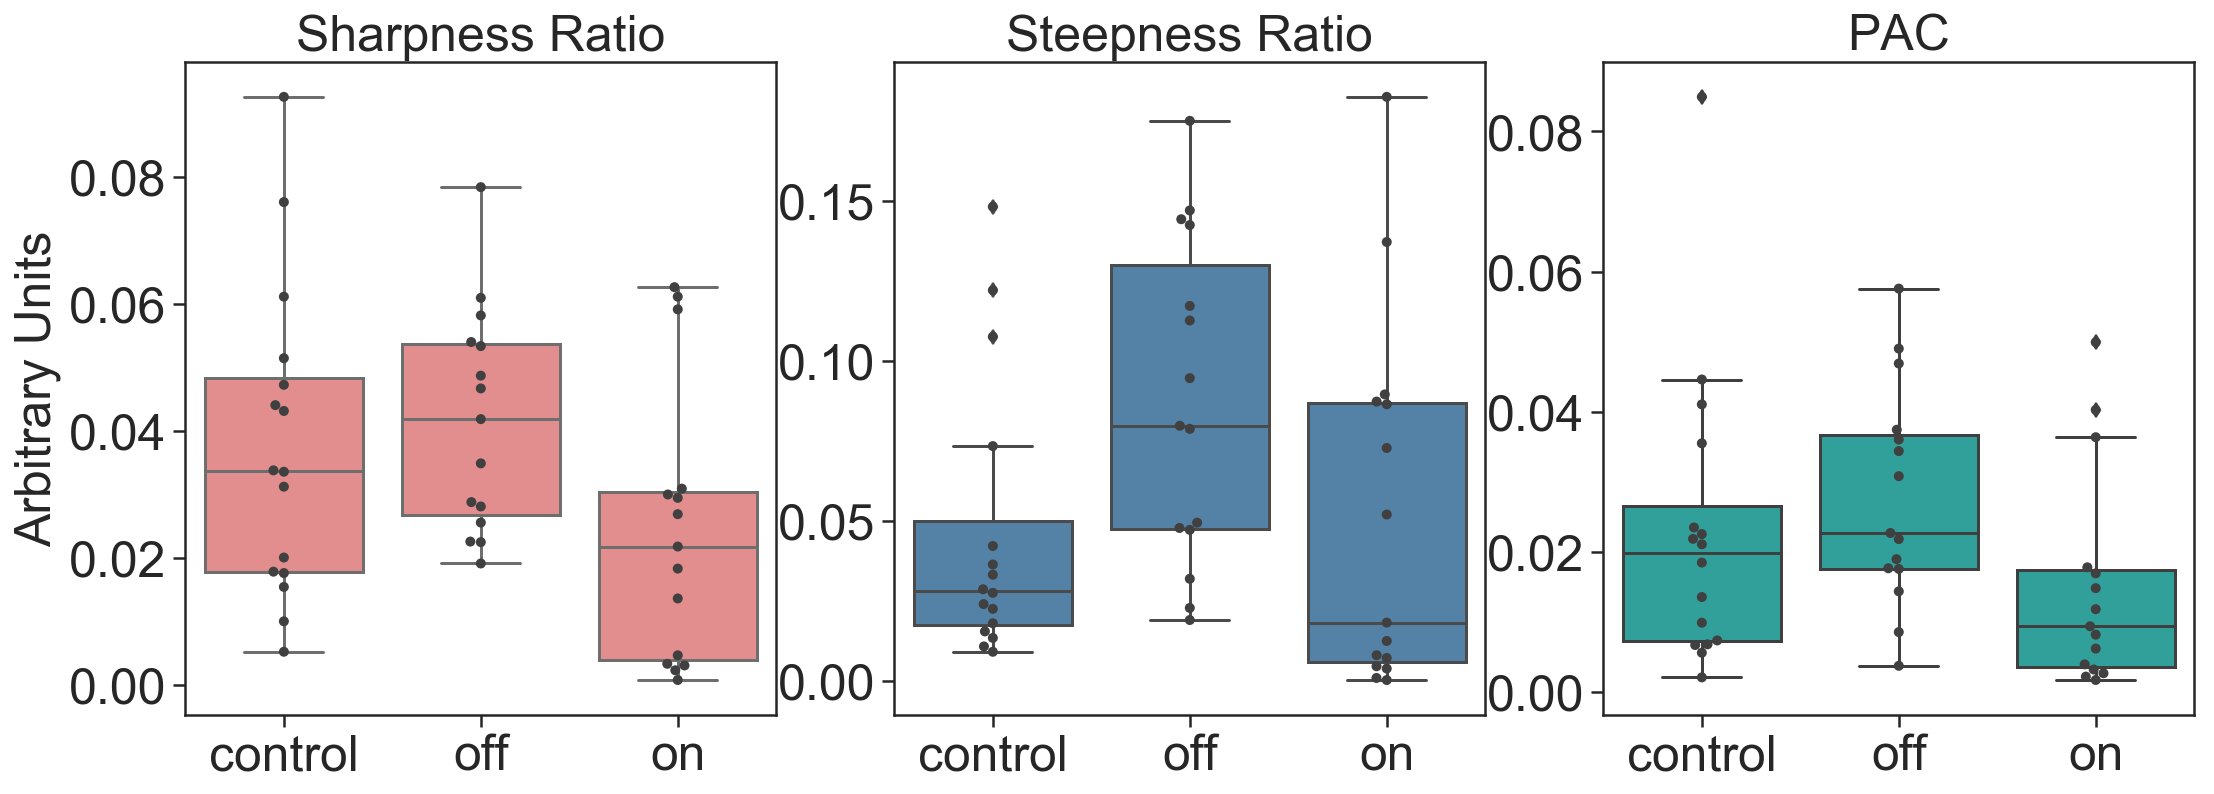

In [9]:
import pandas as pd
import seaborn as sns
sns.mpl.rc("figure", figsize=(18,6))
sns.set(font_scale=1.5)
sns.set_style('ticks')

ShR={'off':ShRoff,'on':ShRon,'control':ShRC}
StR={'off':StRoff,'on':StRon,'control':StRC}
pac={'off':pacoff,'on':pacon,'control':pacC}

ShR_dat = pd.DataFrame({ key:pd.Series(value) for key, value in ShR.items() })
StR_dat = pd.DataFrame({ key:pd.Series(value) for key, value in StR.items() })
pac_dat = pd.DataFrame({ key:pd.Series(value) for key, value in pac.items() })

c1='lightcoral'
c2='steelblue'
c3='lightseagreen'

fig,(ax1,ax2,ax3)=plt.subplots(1,3)

fs=25
sns.boxplot(data=ShR_dat,ax=ax1,color=c1)
ax1.set_title('Sharpness Ratio',fontsize=fs)
ax1.set_ylabel("Arbitrary Units",fontsize=fs)

ax1.tick_params(labelsize=25)
sns.swarmplot(data=ShR_dat,ax=ax1, color="0.25")

sns.boxplot(data=StR_dat,ax=ax2,color=c2)
ax2.set_title('Steepness Ratio',fontsize=fs)
ax2.tick_params(labelsize=25)

sns.swarmplot(data=StR_dat,ax=ax2, color="0.25")

sns.boxplot(data=pac_dat,ax=ax3,color=c3)
ax3.set_title('PAC',fontsize=fs)
ax3.tick_params(labelsize=25)
sns.swarmplot(data=pac_dat,ax=ax3, color="0.25")
plt.show

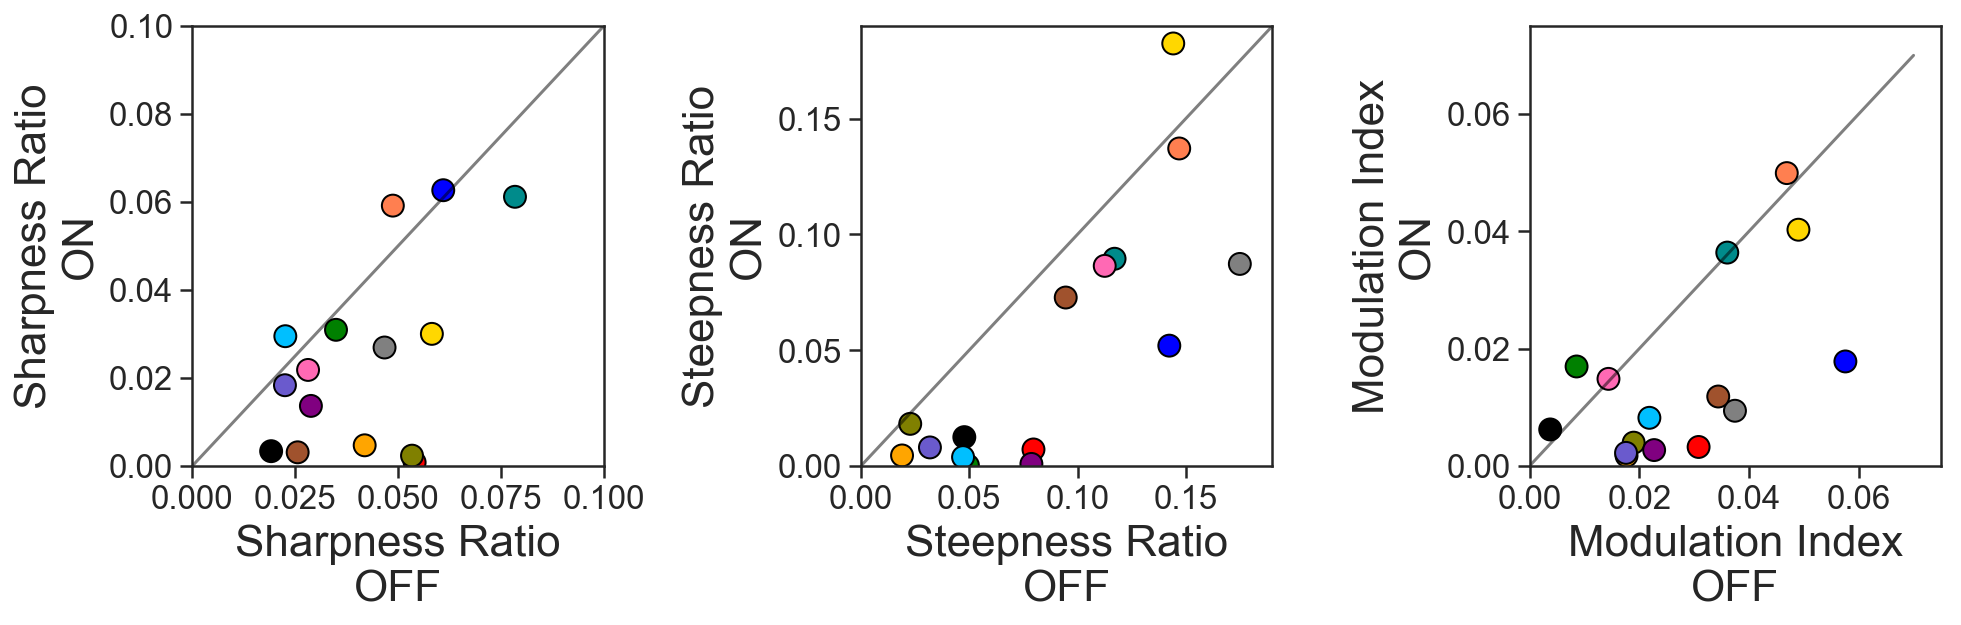

In [11]:
fig=plt.figure(figsize=(14,8))
colors = ['red','green','blue','black','gray','orange','sienna','darkcyan','deepskyblue','hotpink','coral','olive','gold','purple','slateblue']
saxis=22
markersize=120

fig.add_subplot(234)
plt.figure(1, figsize=(4,4))
plt.scatter(ShRoff,ShRon,c=colors,s=markersize, edgecolor='black')
plt.xlabel("Sharpness Ratio\nOFF",size=saxis)
plt.ylabel("Sharpness Ratio\nON",size=saxis)
plt.axis([0, 0.1, 0, 0.1])
plt.plot([0,0.1],[0,0.1],c='black',alpha=.5)

fig.add_subplot(235)
plt.scatter(StRoff,StRon,c=colors,s=markersize,edgecolor='black')
plt.xlabel("Steepness Ratio\nOFF",size=saxis)
plt.ylabel("Steepness Ratio\nON",size=saxis)
plt.axis([0,0.19,0,0.19])
plt.plot([0,0.2],[0,0.2],c='black',alpha=.5)

fig.add_subplot(236)
plt.plot([0,0.07],[0,0.07],c='black',alpha=.5)
plt.scatter(pacoff,pacon,c=colors,s=markersize,edgecolor='black')
plt.xlabel("Modulation Index\nOFF",size=saxis)
plt.ylabel("Modulation Index\nON",size=saxis)
plt.axis([0, 0.075, 0, 0.075])
plt.tight_layout()

<b><font size="5">Figure 3

ShR and StR correlate (Spearman) with PAC in both medication states. 
ShR - off meds: r = 0.69, p = 0.004; on meds: r = 0.74, p = 0.002. 
StR - off meds: r = 0.71, p = 0.003; on meds: r = 0.64, p = 0.010

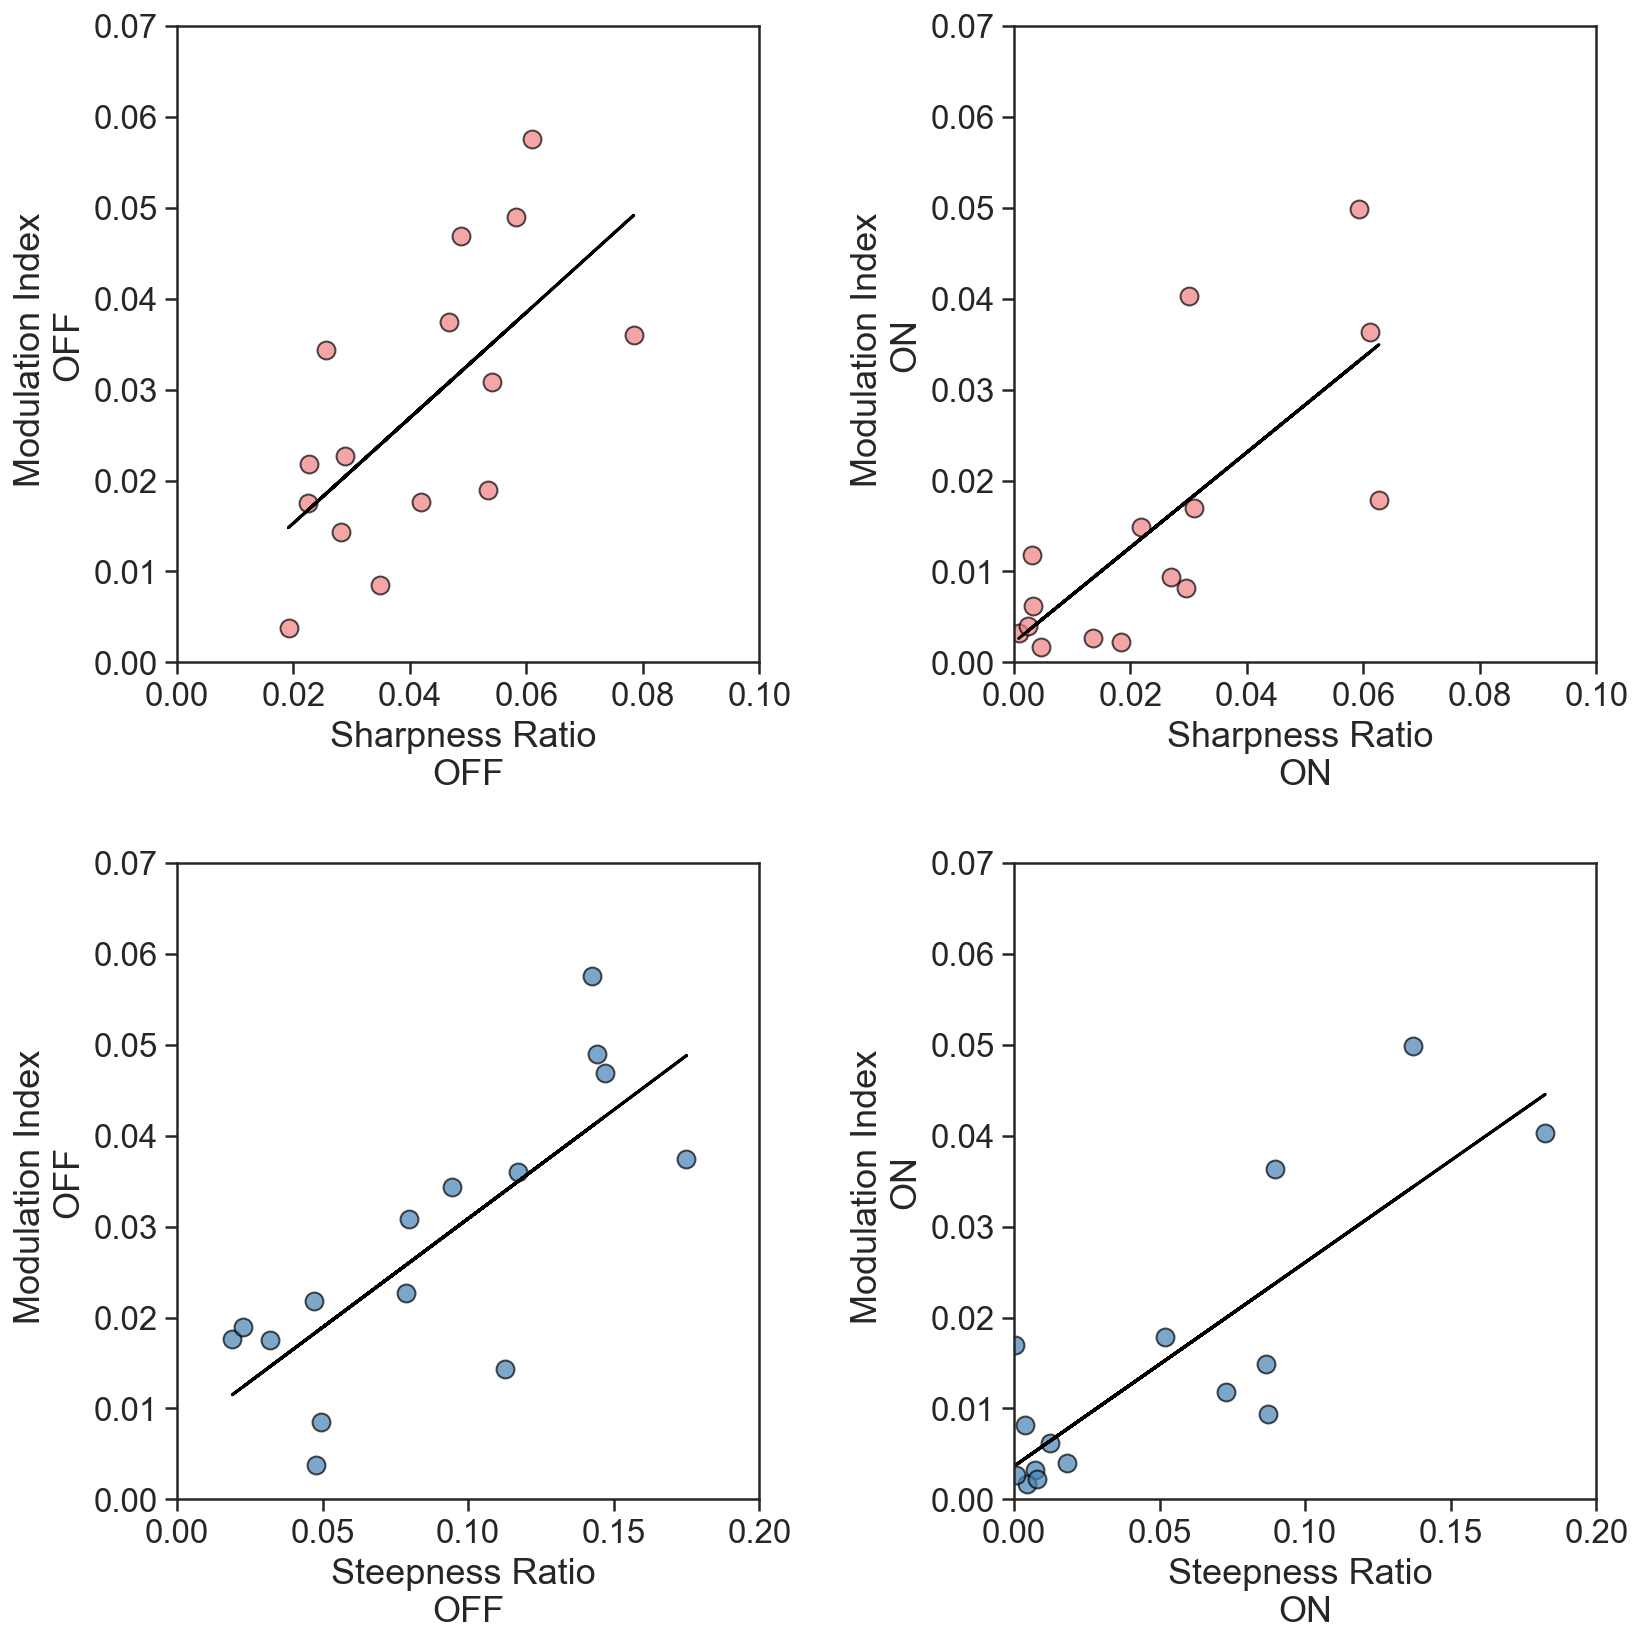

SpearmanrResult(correlation=0.7, pvalue=0.0036660678988013817)
SpearmanrResult(correlation=0.7392857142857142, pvalue=0.0016355111435407642)
SpearmanrResult(correlation=0.7392857142857142, pvalue=0.0016355111435407642)
SpearmanrResult(correlation=0.6749999999999999, pvalue=0.00576349921805083)


In [13]:
# calculate the trendline
def trendline(x,y):
    z = np.polyfit(x,y,1)
    p = np.poly1d(z)    
    return p(x)

p1=trendline(ShRoff,pacoff)
p2=trendline(ShRon,pacon)
p3=trendline(StRoff,pacoff)
p4=trendline(StRon,pacon)

fig=plt.figure(figsize=(12,12))
plt.rcParams.update({'font.size': 25})
lw=1
sizes=80
a_=0.7
ShRc='salmon'
StRc='dodgerblue'

fig.add_subplot(221)
plt.scatter(ShRoff,pacoff, c=c1,s=sizes,alpha=a_,linewidths=lw,edgecolors='black', marker="o")
plt.ylim(0,.07)
plt.xlim(0,.1)
plt.plot(ShRoff,p1,c='black')
plt.xlabel('Sharpness Ratio \nOFF')
plt.ylabel('Modulation Index \nOFF')

fig.add_subplot(222)
plt.scatter(ShRon,pacon, c=c1,s=sizes,alpha=a_,linewidths=lw,edgecolors='black', marker="o")
plt.plot(ShRon,p2,c='black')

plt.ylim(0,.07)
plt.xlim(0,.1)
plt.xlabel('Sharpness Ratio \nON')
plt.ylabel('Modulation Index \nON')

fig.add_subplot(223)
plt.scatter(StRoff,pacoff, c=c2,s=sizes,alpha=a_,linewidths=lw,edgecolors='black', marker="o")
plt.plot(StRoff,p3,c='black')

plt.ylim(0,.07)
plt.xlim(0,.2)
plt.xlabel('Steepness Ratio \nOFF')
plt.ylabel('Modulation Index \nOFF')

fig.add_subplot(224)
plt.scatter(StRon,pacon, c=c2,s=sizes,alpha=a_,linewidths=lw,edgecolors='black', marker="o")
plt.plot(StRon,p4,c='black')

plt.ylim(0,.07)
plt.xlim(0,.2)
plt.xlabel('Steepness Ratio \nON')
plt.ylabel('Modulation Index \nON')
plt.tight_layout()
plt.savefig('Fig3.eps', format='eps', dpi=300)
plt.show()

print(sp.stats.spearmanr(ShRoff,pacoff))
print(sp.stats.spearmanr(ShRon,pacon))
print(sp.stats.spearmanr(StRoff,pacoff))
print(sp.stats.spearmanr(StRon,pacon))

Additional Analyses

In [17]:
from statistics import mean, stdev
from math import sqrt
from numpy import var

#in python "**" means squared
def effectsize(M1,M2):
    cohens_d = (mean(M1) - mean(M2)) / (sqrt(((stdev(M1) ** 2) + (stdev(M2) ** 2)) / 2))
    return cohens_d
print('offvon')
print(effectsize(ShRoff,ShRon))
print(effectsize(StRoff,StRon))
print(effectsize(pacoff,pacon))
print('offvcontrol')
print(effectsize(ShRoff,ShRC))
print(effectsize(StRoff,StRC))
print(effectsize(pacoff,pacC))

offvon
0.8649559086612877
0.6783646833454511
0.8316494751302367
offvcontrol
0.1913137537439105
0.8830669104644595
0.2701715938888003
